<a href="https://colab.research.google.com/github/chwdoit/BigData/blob/main/%ED%99%95%EC%A7%84%EC%9E%90_%EC%A6%9D%EA%B0%80_%EC%86%8D%EB%8F%84%EC%99%80_%EC%84%B1%EA%B2%A9%EC%9D%98_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

from datetime import datetime, timedelta

plt.style.use('dark_background')
mpl.rcParams['axes.unicode_minus'] = False
#font_path = '/content/drive/MyDrive/data/AppleSDGothicNeo.ttc'
#font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
#font_name = fm.FontProperties(fname=font_path, size=50).get_name()#plt.rc('font', family=font_name)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# Load Big 5 Dataset
# https://www.kaggle.com/datasets/tunguz/big-five-personality-test
# https://blog.naver.com/ygahon/60157517095
# https://openpsychometrics.org/tests/IPIP-BFFM/
pos_questions = [
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        # 7 Openness 개방성
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               # 6 Conscientiousness 성실성
    'EXT1','EXT3','EXT5','EXT7','EXT9',                       # 5 Extroversion 외향성
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',               # 6 Agreeableness 친화성
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', # 8 Emotional Stability 안정성(신경성)
]

neg_questions = [
    'OPN2','OPN4','OPN6',                # 3 Openness
    'CSN2','CSN4','CSN6','CSN8',         # 4 Conscientiousness
    'EXT2','EXT4','EXT6','EXT8','EXT10', # 5 Extroversion
    'AGR1','AGR3','AGR5','AGR7',         # 4 Agreeableness
    'EST2','EST4',                       # 2 Emotional Stability
]

usecols = pos_questions + neg_questions + ['country']

df = pd.read_csv('/content/data-final.csv', sep='\t', usecols=usecols) # tsv

print(len(df))

df.head()

7666


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4,1,5,2,5,1,5,2,4,1,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3,5,3,4,3,3,2,5,1,5,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2,3,4,4,3,2,1,3,2,5,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2,2,2,3,4,2,2,4,1,4,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3,3,3,3,5,3,3,5,3,4,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [ ]:
# Drop Rows Contains 0  0포함된거를 지우기 위한 과정!
df = df.replace(0, np.nan).dropna(axis=0).reset_index(drop=True) # 0 제거

print(len(df))

df.head()

6583


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [ ]:
# Filter Countries
df_2 = (df.groupby('country').agg('count')['EXT1'] > 100).reset_index() # 답변이 적으면 pass

fc = df_2[df_2['EXT1'] == True]['country']

df = df[df['country'].isin(fc)].reset_index(drop=True)

df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
2,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
3,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0,SE
4,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,2.0,4.0,3.0,4.0,1.0,5.0,5.0,4.0,4.0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,2.0,2.0,4.0,2.0,5.0,2.0,4.0,5.0,4.0,2.0,...,1.0,4.0,1.0,4.0,1.0,4.0,2.0,4.0,4.0,AU
5249,5.0,1.0,4.0,2.0,5.0,2.0,4.0,2.0,5.0,3.0,...,2.0,5.0,3.0,5.0,1.0,5.0,5.0,4.0,5.0,US
5250,2.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,...,2.0,5.0,3.0,4.0,2.0,4.0,3.0,4.0,4.0,US
5251,4.0,1.0,4.0,3.0,5.0,1.0,3.0,2.0,2.0,5.0,...,4.0,4.0,2.0,2.0,2.0,4.0,2.0,2.0,3.0,US


In [ ]:
# Positive Negative Scores / 1 ~ 5 => -2 ~ 2 반대로 적용(negative)
df[pos_questions] = df[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})
df[neg_questions] = df[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})

df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,GB
1,-1.0,0.0,1.0,-1.0,0.0,1.0,-2.0,0.0,-1.0,-2.0,...,2.0,-1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,GB
2,-1.0,1.0,-1.0,0.0,1.0,1.0,-1.0,-1.0,-2.0,-1.0,...,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,GB
3,0.0,0.0,1.0,1.0,1.0,1.0,-1.0,0.0,0.0,-1.0,...,2.0,2.0,2.0,0.0,2.0,2.0,1.0,2.0,-1.0,SE
4,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,US


In [ ]:
# Compute Scores / 같은 항목의 질문들을 취합
traits = {
    'OPN': '개방성',
    'CSN': '성실성',
    'EXT': '외향성',
    'AGR': '친화성',
    'EST': '안정성'
}

for trait, trait_kor in traits.items():
    trait_cols = sorted([col for col in df.columns if trait in col])
    df[trait_kor] = df[trait_cols].sum(axis=1)

df_traits = df[list(traits.values()) + ['country']].copy()
df_traits.head()

<ipython-input-7-ee9bd9816ac2>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[trait_kor] = df[trait_cols].sum(axis=1)


,개방성,성실성,외향성,친화성,안정성,country
0,15.0,1.0,16.0,9.0,-6.0,GB
1,11.0,6.0,-5.0,12.0,-4.0,GB
2,9.0,-7.0,-4.0,8.0,-1.0,GB
3,14.0,6.0,2.0,8.0,-8.0,SE
4,13.0,0.0,5.0,11.0,0.0,US


<ipython-input-8-6722a0afb36a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_traits[trait], kde=False, bins=40, axlabel=False)


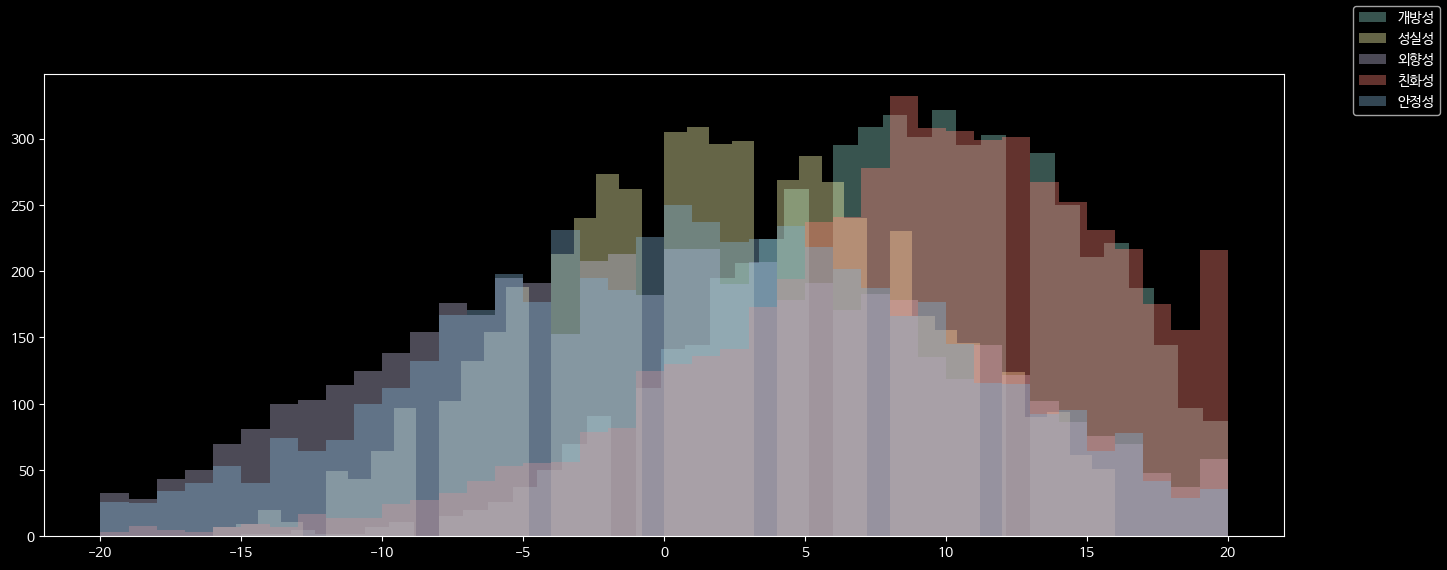

In [ ]:
# Distribution Plot
fig = plt.figure(figsize=(16, 6))

for trait in traits.values():
    sns.distplot(df_traits[trait], kde=False, bins=40, axlabel=False)

fig.legend(traits.values())

<ipython-input-9-9fed62829d49>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_traits[df_traits['country'] == 'KR']['개방성'], bins=40, axlabel=False)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
<ipython-input-9-9fed62829d49>:5: UserW

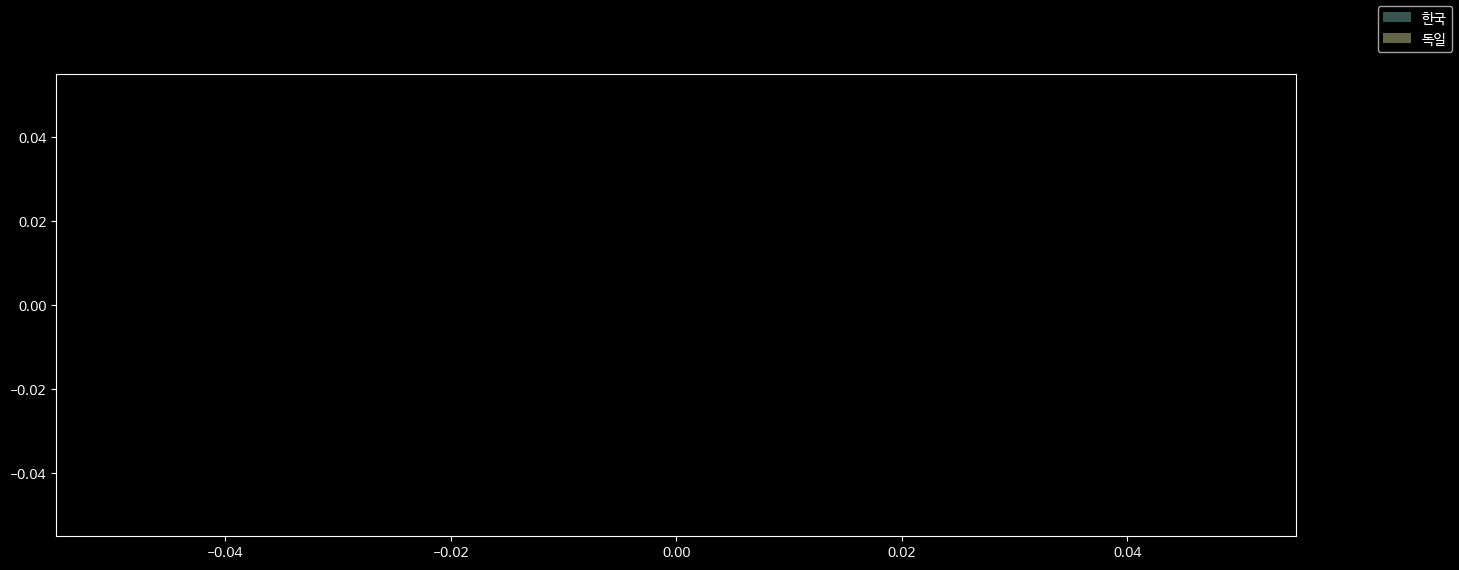

In [ ]:
# Openness Korea vs Germany
fig = plt.figure(figsize=(16, 6))

sns.distplot(df_traits[df_traits['country'] == 'KR']['개방성'], bins=40, axlabel=False)
sns.distplot(df_traits[df_traits['country'] == 'DE']['개방성'], bins=40, axlabel=False)

fig.legend(['한국', '독일'])

In [ ]:
# Compute Mean by Countries
df_traits_mean = df_traits.groupby('country').mean().rename_axis('country').reset_index()

df_traits_mean

,country,개방성,성실성,외향성,친화성,안정성
0,AU,7.280423,2.137566,0.306878,7.632275,-0.447090
1,CA,8.819383,1.773128,-0.257709,7.363436,-0.319383
2,GB,8.805296,0.883178,-0.144860,7.149533,2.056075
3,IN,7.936508,0.682540,-1.309524,7.539683,1.880952
4,NL,7.669291,1.393701,2.763780,8.204724,-1.377953
5,PH,6.330189,2.556604,-2.216981,6.556604,1.471698
6,SE,9.719626,2.196262,1.831776,7.869159,-0.672897
7,US,8.517960,2.298823,-0.158768,8.340477,0.556595


In [ ]:
#####################################
# COVID-19 Dataset
# github.com/datasets/covid-19
# github.com/core/country-list
df_covid = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv', parse_dates=['Date'])

df_covid.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [ ]:
# Country Code

cc = pd.read_csv('/content/country_code.csv')

cc.head()

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [ ]:
# Filter Dataset Step 1
# Drop rows Confirmed <= 50
# Sum 'Province/State' level over by country
df_covid = df_covid[df_covid['Confirmed'] > 50].reset_index(drop=True)

df_covid = df_covid.groupby(['Country/Region', 'Date']).sum().reset_index()

df_covid[df_covid['Country/Region'] == 'US']

<ipython-input-13-bfb49c4a2f05>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_covid = df_covid.groupby(['Country/Region', 'Date']).sum().reset_index()


,Country/Region,Date,Confirmed,Recovered,Deaths
126911,US,2020-03-02,55,7.0,6
126912,US,2020-03-03,74,7.0,7
126913,US,2020-03-04,107,7.0,11
126914,US,2020-03-05,184,7.0,12
126915,US,2020-03-06,237,7.0,14
...,...,...,...,...,...
127682,US,2022-04-12,80477797,0.0,986387
127683,US,2022-04-13,80518989,0.0,987343
127684,US,2022-04-14,80573532,0.0,988121
127685,US,2022-04-15,80612681,0.0,988558


In [ ]:
# Filter Dataset Step 2
# Over 14 days from after 50 confirmed
n_days = 14

filtered = (
    datetime.now() - df_covid.groupby('Country/Region')['Date'].min() > timedelta(days=n_days)
).reset_index().rename(columns={'Date': 'Filtered'})

filtered_countries = filtered[filtered['Filtered'] == True]['Country/Region']

df_covid = df_covid[df_covid['Country/Region'].isin(filtered_countries)]

df_covid_14days = df_covid.groupby('Country/Region').head(n_days).groupby('Country/Region').tail(1)

df_covid_14days

,Country/Region,Date,Confirmed,Recovered,Deaths
13,Afghanistan,2020-04-07,367,18.0,11
766,Albania,2020-03-29,212,33.0,10
1528,Algeria,2020-03-29,511,31.0,31
2290,Andorra,2020-04-01,390,10.0,14
3049,Angola,2020-06-01,86,18.0,4
...,...,...,...,...,...
133819,West Bank and Gaza,2020-04-04,217,21.0,1
134575,Winter Olympics 2022,2022-02-05,425,0.0,0
134659,Yemen,2020-05-23,212,6.0,39
135366,Zambia,2020-04-30,106,55.0,3


In [ ]:
# Merge All
df_covid_14days = df_covid_14days.merge(cc, left_on='Country/Region', right_on='Name')

df_covid_14days = df_covid_14days.merge(df_traits_mean, left_on='Code', right_on='country')

df_covid_14days.sort_values('Confirmed', ascending=False)

,Country/Region,Date,Confirmed,Recovered,Deaths,Name,Code,country,개방성,성실성,외향성,친화성,안정성
3,Netherlands,2020-03-17,2051,0.0,43,Netherlands,NL,NL,7.669291,1.393701,2.763780,8.204724,-1.377953
6,United Kingdom,2020-03-12,1787,18.0,9,United Kingdom,GB,GB,8.805296,0.883178,-0.144860,7.149533,2.056075
0,Australia,2020-03-23,1617,85.0,7,Australia,AU,AU,7.280423,2.137566,0.306878,7.632275,-0.447090
1,Canada,2020-03-19,1277,0.0,21,Canada,CA,CA,8.819383,1.773128,-0.257709,7.363436,-0.319383
5,Sweden,2020-03-17,1265,0.0,14,Sweden,SE,SE,9.719626,2.196262,1.831776,7.869159,-0.672897
4,Philippines,2020-03-25,636,26.0,38,Philippines,PH,PH,6.330189,2.556604,-2.216981,6.556604,1.471698
2,India,2020-03-23,499,27.0,10,India,IN,IN,7.936508,0.682540,-1.309524,7.539683,1.880952


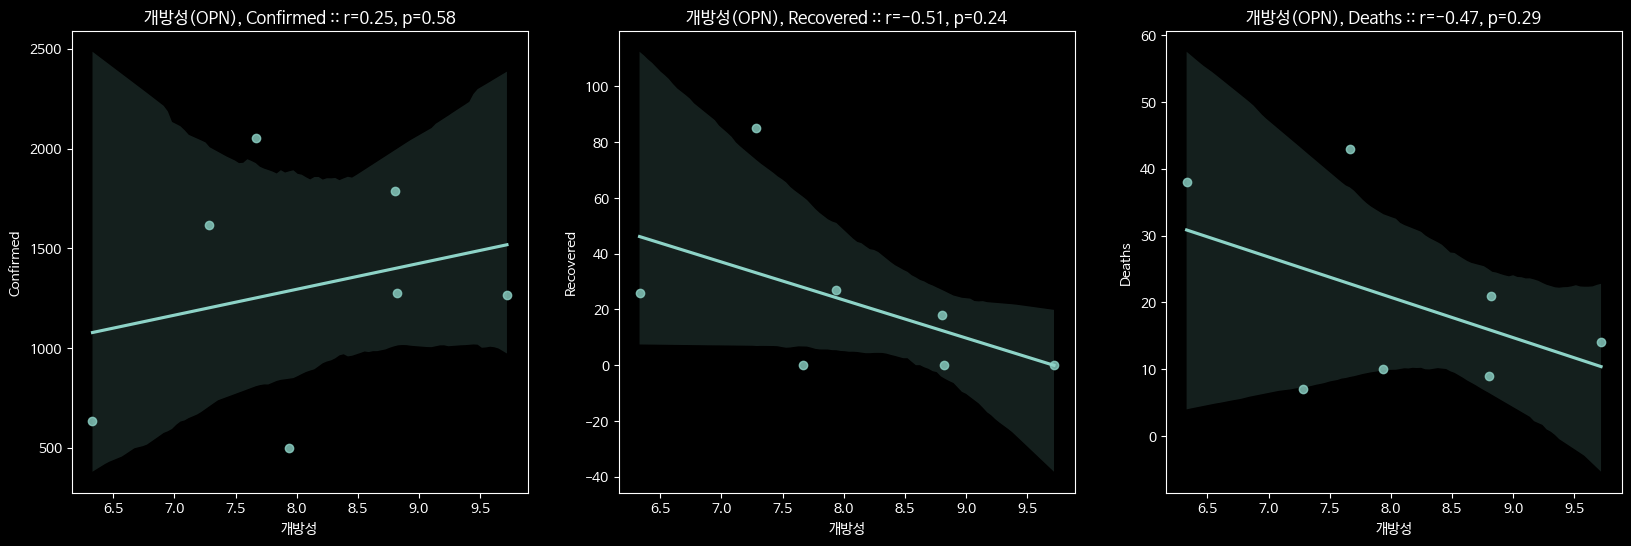

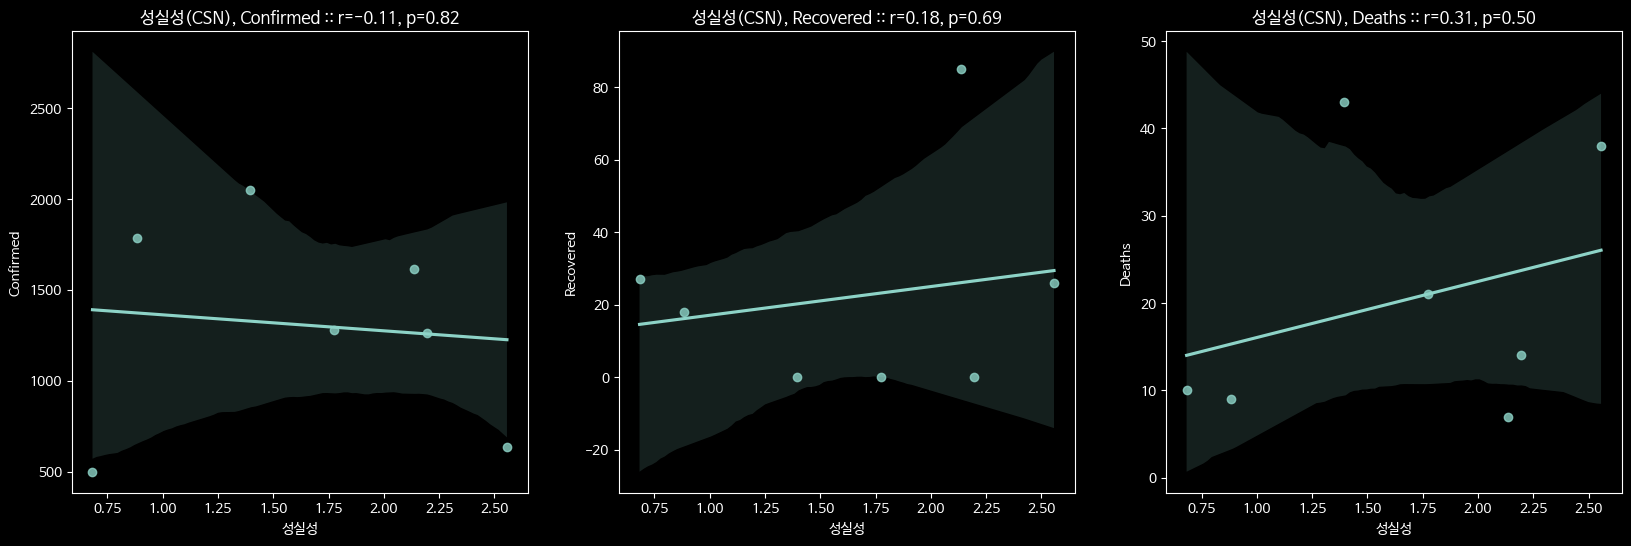

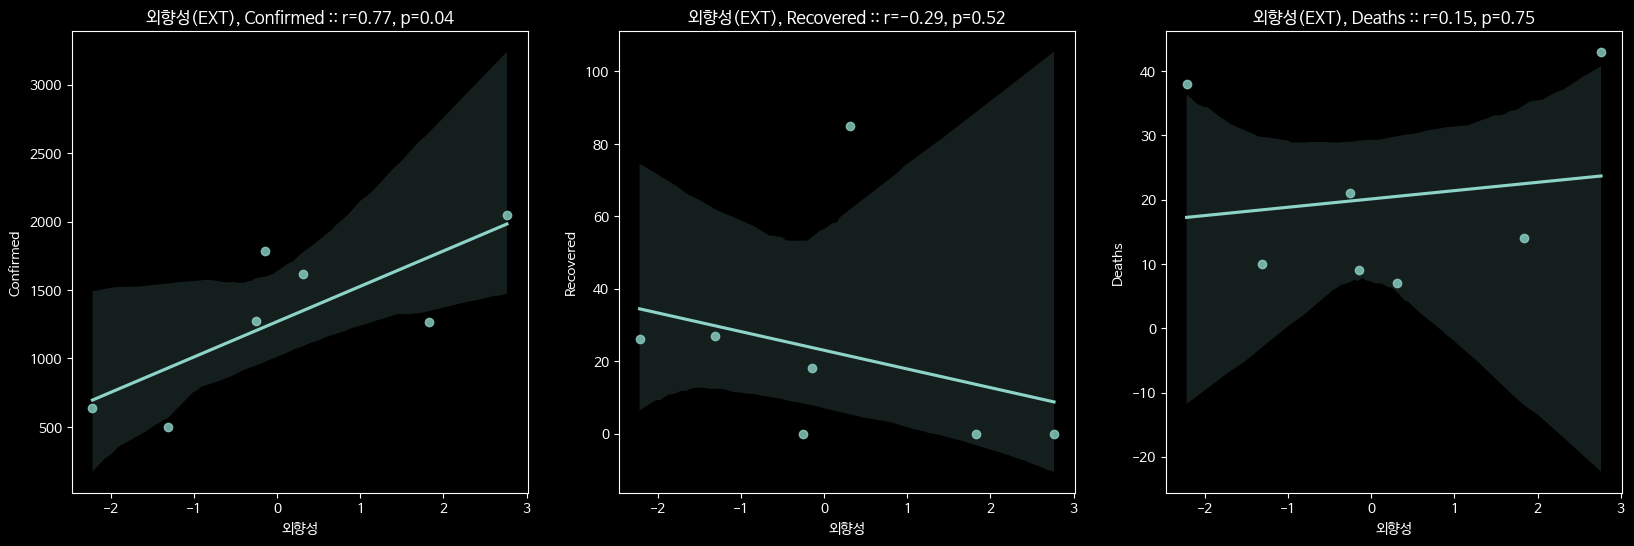

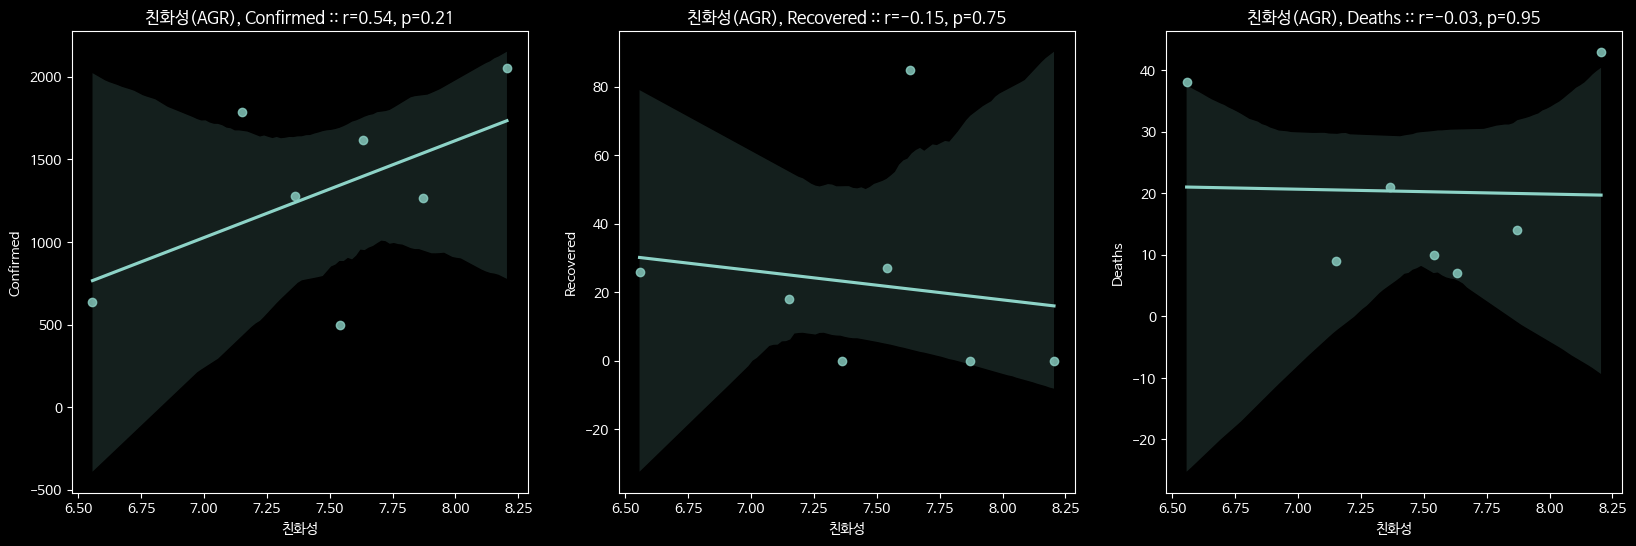

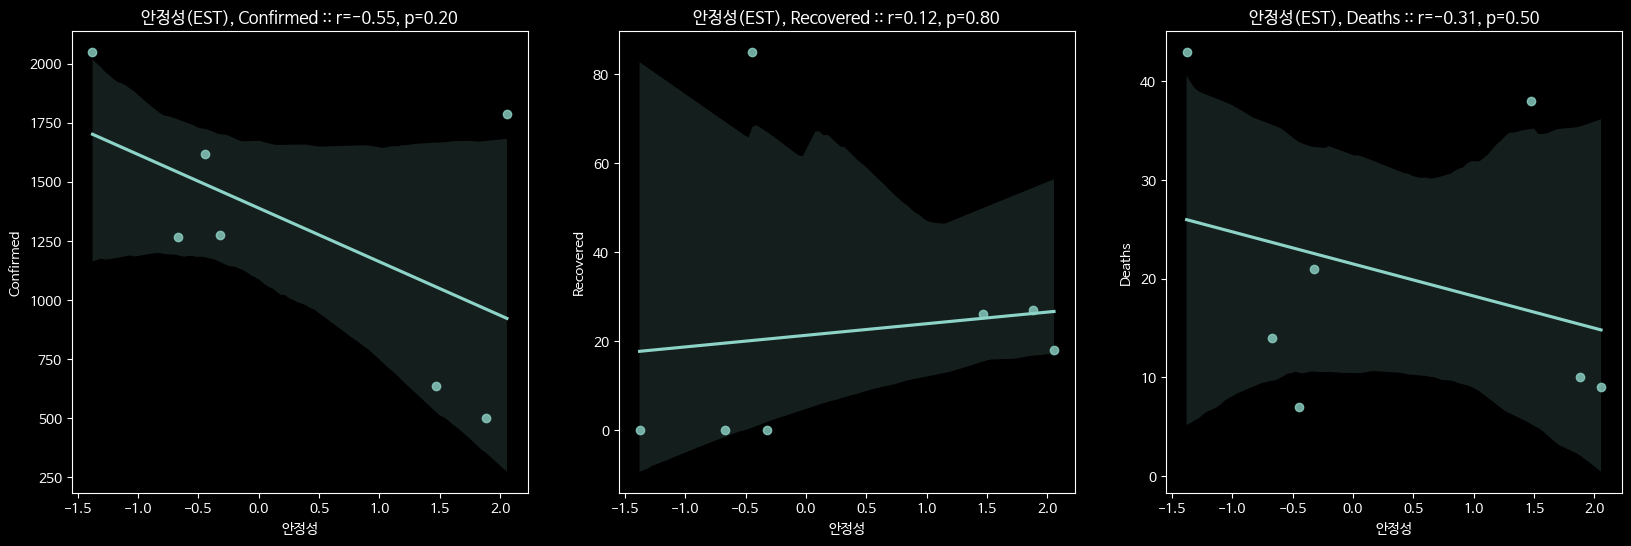

In [ ]:
# Compute Pearson Correlation
new_df = df_covid_14days[
    ~df_covid_14days['country'].isin(['CN', 'TR']) # 경향에서 벗어나서 제외
]

for trait, trait_kor in traits.items():
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for i, n in enumerate(['Confirmed', 'Recovered', 'Deaths']):
        corr = pearsonr(
            new_df[trait_kor],
            new_df[n]
        )

        sns.regplot(x=trait_kor, y=n, data=new_df, ax=axes[i])
        axes[i].set_title('%s(%s), %s :: r=%.2f, p=%.2f' % (trait_kor, trait, n, corr[0], corr[1])) #[1] 틀릴 확률

In [ ]:
# Sort by Openness
new_df.sort_values('개방성', ascending=False)

,Country/Region,Date,Confirmed,Recovered,Deaths,Name,Code,country,개방성,성실성,외향성,친화성,안정성
5,Sweden,2020-03-17,1265,0.0,14,Sweden,SE,SE,9.719626,2.196262,1.831776,7.869159,-0.672897
1,Canada,2020-03-19,1277,0.0,21,Canada,CA,CA,8.819383,1.773128,-0.257709,7.363436,-0.319383
6,United Kingdom,2020-03-12,1787,18.0,9,United Kingdom,GB,GB,8.805296,0.883178,-0.144860,7.149533,2.056075
2,India,2020-03-23,499,27.0,10,India,IN,IN,7.936508,0.682540,-1.309524,7.539683,1.880952
3,Netherlands,2020-03-17,2051,0.0,43,Netherlands,NL,NL,7.669291,1.393701,2.763780,8.204724,-1.377953
0,Australia,2020-03-23,1617,85.0,7,Australia,AU,AU,7.280423,2.137566,0.306878,7.632275,-0.447090
4,Philippines,2020-03-25,636,26.0,38,Philippines,PH,PH,6.330189,2.556604,-2.216981,6.556604,1.471698


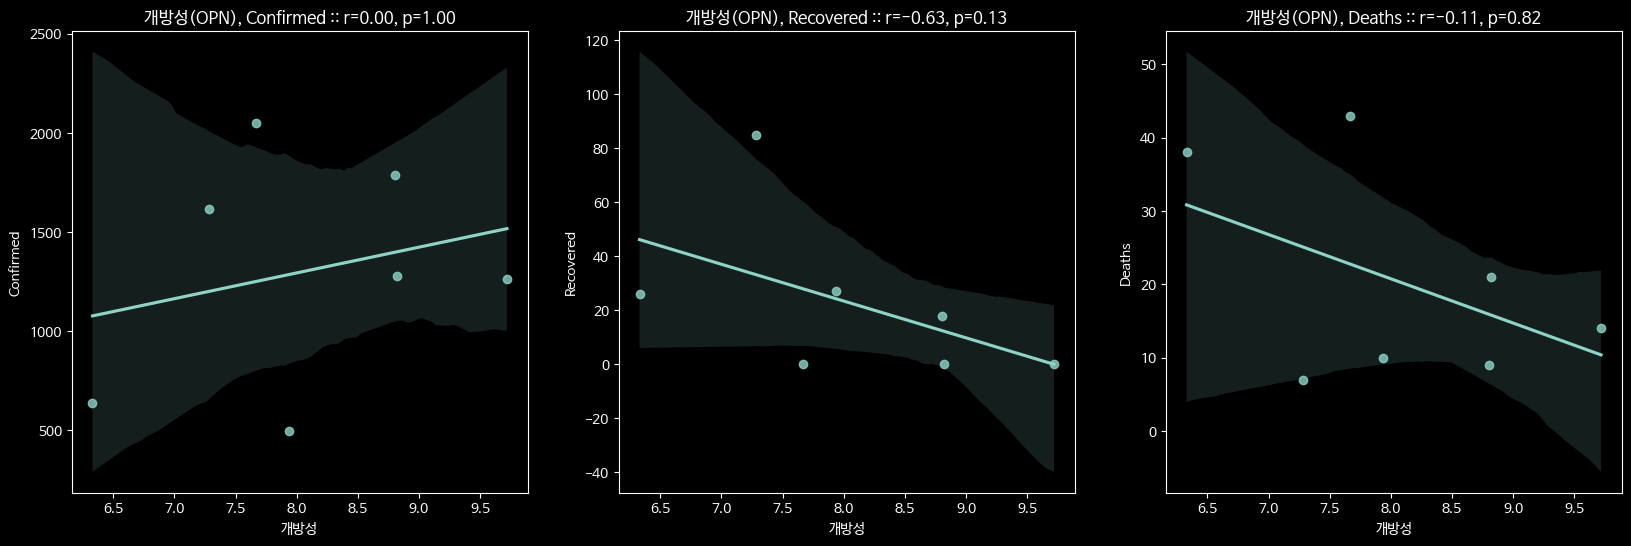

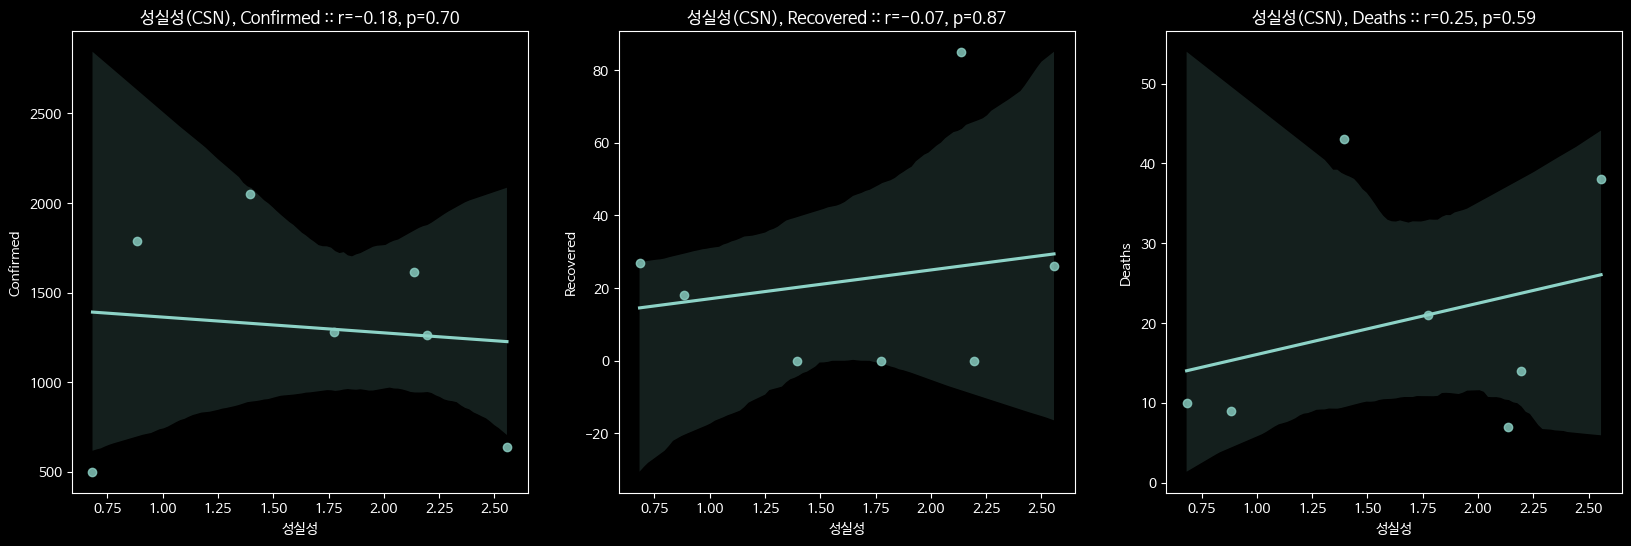

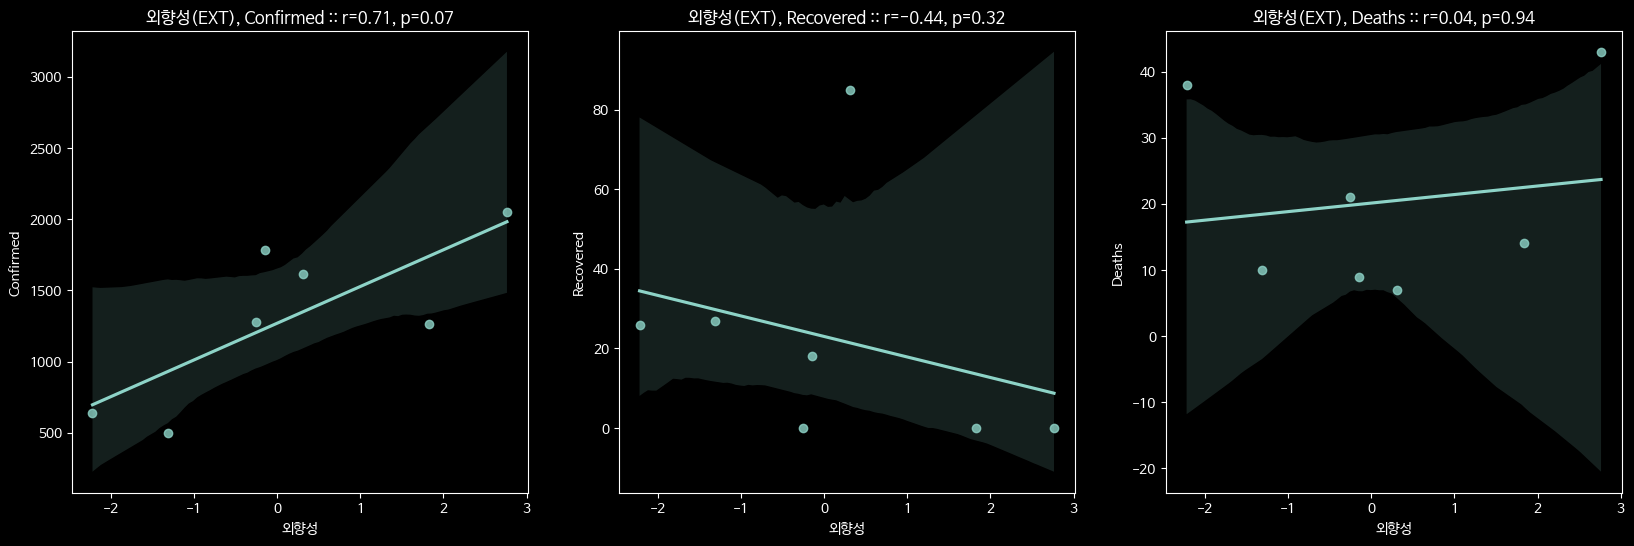

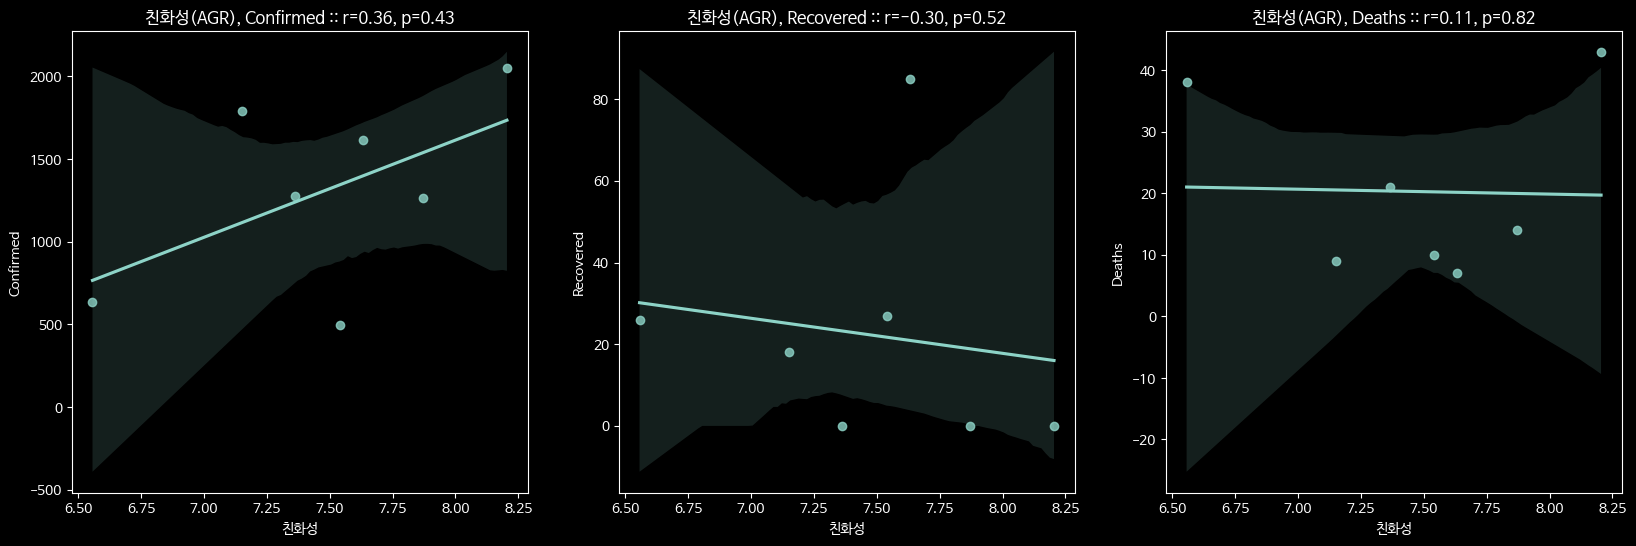

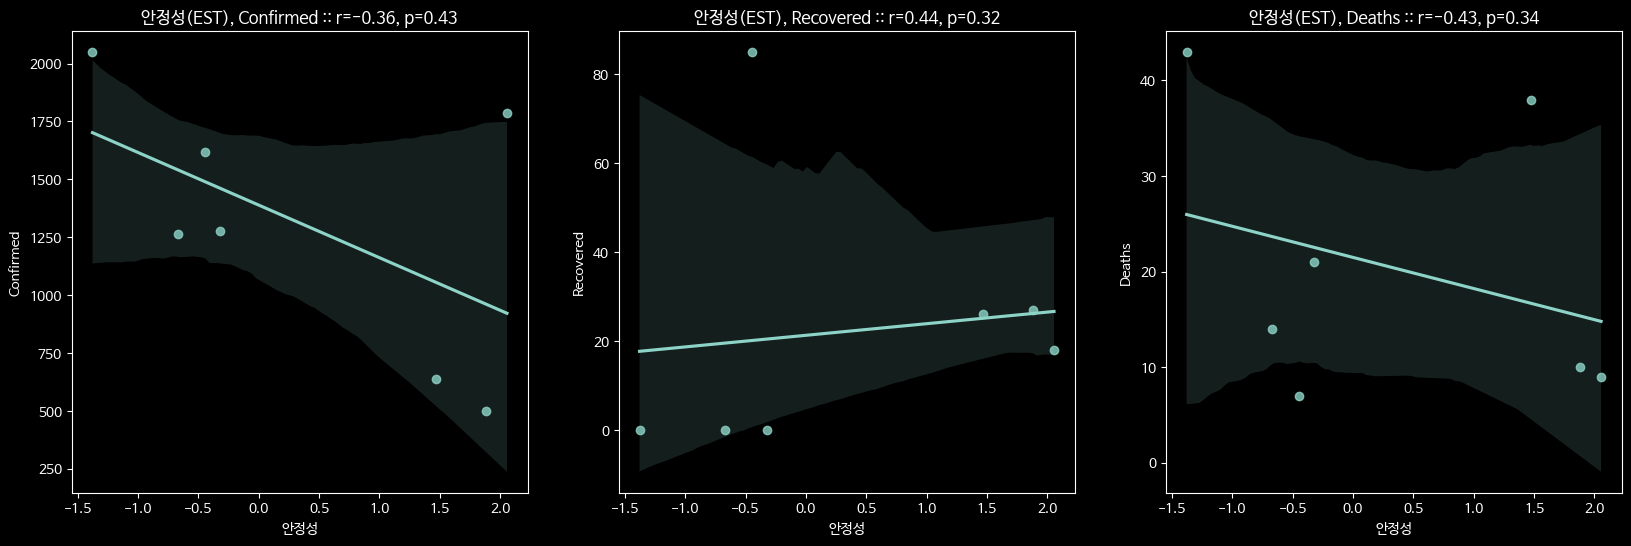

In [ ]:
# Use spearmanr Instead of pearsonr
for trait, trait_kor in traits.items():
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for i, n in enumerate(['Confirmed', 'Recovered', 'Deaths']):
        corr = spearmanr(
            new_df[trait_kor],
            new_df[n]
        )

        sns.regplot(x=trait_kor, y=n, data=new_df, ax=axes[i])
        axes[i].set_title('%s(%s), %s :: r=%.2f, p=%.2f' % (trait_kor, trait, n, corr[0], corr[1]))